# Importing and Querying Data with PostgreSQL (Apartment Data)

## Libraries and Settings

In [1]:
# Libraries
import os
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Define settings for graphics
plt.style.use('dark_background')

# Current working directory
print(os.getcwd())

/workspaces/python_postgresql_pgadmin


## Read data to data frame

In [2]:
# Read apartment data
df = pd.read_csv('Data/apartments_data_prepared.csv', sep=',')
df.head(5)

,web-scraper-order,web-scraper-start-url,rooms_area_price_raw,address_raw,price_raw,description_raw,text_raw,rooms,area,price
0,1662023695-433,https://www.immoscout24.ch/de/wohnung/mieten/k...,"3,5 Zimmer, 122 m², CHF 3180.—","Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",CHF 3180.—,"«Grosse Galerie, Terrasse mit Pergola, Berg- u...","3,5 Zimmer, 122 m², CHF 3180.—Sunnenbergstrass...",3.5,122.0,3180.0
1,1662023745-820,https://www.immoscout24.ch/de/wohnung/mieten/k...,"2,5 Zimmer, 78 m², CHF 3760.—","Lavaterstr. 63, 8002 Zürich, ZH",CHF 3760.—,«Wunderschöne Wohnung im Enge-Quartier»,"2,5 Zimmer, 78 m², CHF 3760.—Lavaterstr. 63, 8...",2.5,78.0,3760.0
2,1662023742-807,https://www.immoscout24.ch/de/wohnung/mieten/k...,"5,5 Zimmer, 115 m², CHF 2860.—","Langfurrenstrasse 5c, 8623 Wetzikon ZH, ZH",CHF 2860.—,«Wohnmomente zum Festhalten»,"5,5 Zimmer, 115 m², CHF 2860.—Langfurrenstrass...",5.5,115.0,2860.0
3,1662023804-1290,https://www.immoscout24.ch/de/wohnung/mieten/k...,"3,5 Zimmer, 74 m², CHF 2165.—","Sandbuckweg 5A, 8157 Dielsdorf, ZH",CHF 2165.—,"«3,5 pièces, 74 m²»","top3,5 Zimmer, 74 m², CHF 2165.—Sandbuckweg 5A...",3.5,74.0,2165.0
4,1662023739-771,https://www.immoscout24.ch/de/wohnung/mieten/k...,"5,5 Zimmer, 195 m², CHF 6900.—","Parkring 59, 8002 Zürich, ZH",CHF 6900.—,«Wohnanlage Im Parkring - Exklusive Wohnung zu...,"5,5 Zimmer, 195 m², CHF 6900.—Parkring 59, 800...",5.5,195.0,6900.0


## Create database connection

In [3]:
# Set up database connection
user = "pgadmin"
password = "geheim"
host = "localhost"
port = "5432"
database = "postgres"

# Erstellen der Connection URL
db_connection_url = "postgresql://" + user + ":" + password +\
                    "@" + host + ":" + port + "/" + database

# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Test database connection
with engine.connect() as connection:
    result = connection.execute(text('SELECT current_database()'))
    print(result.fetchone())

# Dispose the engine
engine.dispose()

('postgres',)


## Write data frame to database table

In [4]:
# Engine für Datenbankverbindung erstellen
engine = create_engine(db_connection_url)

# Schreiben der DataFrames in die Datenbank
df.to_sql('apartment_table', engine, if_exists='replace')

# Datenbankverbindung trennen
engine.dispose()

## List tables in the database

In [5]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Open a connection
with engine.connect() as connection:

    # Execute the query
    result = connection.execute(text("""SELECT table_name
                                        FROM information_schema.tables
                                        WHERE table_schema = 'public'"""))
    
    # Fetch and print the results
    for row in result:
        print(row[0])

# Dispose the engine
engine.dispose()

geography_columns
geometry_columns
spatial_ref_sys
apartment_table


## Make SQL query to select data

In [6]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Write data to table
df_sub = pd.read_sql_query('''SELECT
                                 address_raw,
                                 rooms,
                                 area,
                                 price
                              FROM apartment_table
                              WHERE price >= 1000
                              ORDER BY price DESC;''', 
                          con=engine)

# Dispose the engine
engine.dispose()

# Show the data
df_sub

,address_raw,rooms,area,price
0,"Parkring 57, 8002 Zürich, ZH",5.0,187.0,8900.0
1,"Drusbergstrasse 62, 8000 Zürich, ZH",4.5,NaN,7900.0
2,"8053 Zürich, ZH",4.5,171.0,7900.0
3,"Giessereistrasse 12, 8005 Zürich, ZH",2.5,282.0,7500.0
4,"Parkring 59, 8002 Zürich, ZH",5.5,195.0,6900.0
...,...,...,...,...
979,"Langackerweg 13, 8155 Niederhasli, ZH",1.0,32.0,1065.0
980,"Säntisweg 5, 8604 Volketswil, ZH",2.0,53.0,1061.0
981,"Schlimpergstrasse 16, 8307 Effretikon, ZH",1.0,26.0,1055.0
982,"Zürcherstrasse 10, 8193 Eglisau, ZH",1.5,34.0,1040.0


## Plot apartment prices

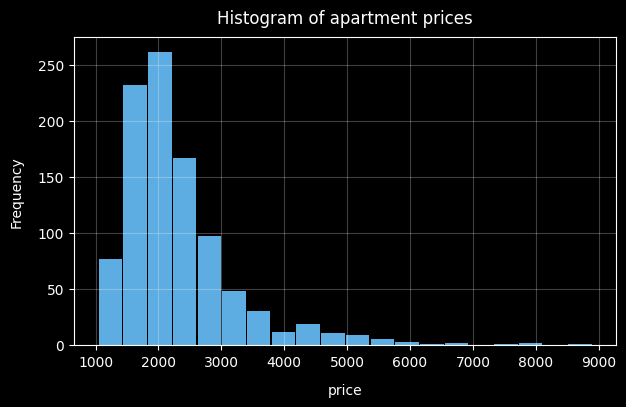

In [7]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df_sub['price'], 
                            bins=20, 
                            color='#5DADE2',
                            alpha=1.00, 
                            rwidth=0.95
                   )
plt.ticklabel_format(style='plain')
plt.grid(alpha=0.25)

# Set labels
plt.xlabel('price', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of apartment prices', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-09-15 13:18:23
Python Version: 3.12.1
-----------------------------------
